# 2. Divide and Conquer

- **Created by Andrés Segura Tinoco**
- **Created on Feb 01, 2020**
- **Updated on Mar 19, 2021**

In computer science, **divide and conquer** is an algorithm design paradigm based on multi-branched recursion. A divide-and-conquer algorithm works by recursively breaking down a problem into two or more sub-problems of the same or related type, until these become simple enough to be solved directly. The solutions to the sub-problems are then combined to give a solution to the original problem <a href="#link_one">[1]</a>.

In [1]:
# Main libraries
import math
import random
import copy
import timeit
import numpy as np
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt

## 2.1. Binary Search

In computer science, **binary search**, also known as half-interval search or logarithmic search, is a search algorithm that finds the position of a target value within a sorted array. Binary search compares the target value to the middle element of the array. If they are not equal, the half in which the target cannot lie is eliminated and the search continues on the remaining half, again taking the middle element to compare to the target value, and repeating this until the target value is found. If the search ends with the remaining half being empty, the target is not in the array <a href="#link_two">[2]</a>.

In [3]:
# Recursive sub-algorithm
def daq_bin_search(l, i, j, x, d=0):
    if i == j:
        return i, d
    
    k = (i + j) // 2
    d = d + 1
    
    if x <= l[k]:
        return daq_bin_search(l, i, k, x, d)
    else:
        return daq_bin_search(l, k + 1, j, x, d)

In [4]:
# Binary search algorithm
def bin_search(l, x):
    n = len(l)
    if n == 0 or x < l[0] or x > l[n - 1]:
        return -1, -1
    
    ix, d = daq_bin_search(l, 0, n - 1, x)
    return ix, d

In [5]:
# Test values
l = [-10, -7, -5, -2, 0, 3, 8, 9, 12, 13, 26, 29, 31, 36, 38, 40]
x = 12

# Run algorithm
ix, depth = bin_search(l, x)
print('Solution ix:', ix, ', value:', l[ix], ', depth:', depth)

Solution ix: 8 , value: 12 , depth: 4


With time complexity of $ \Theta(\log_{}{n}) $.

### Computational Complexity validation

In [6]:
# Creating a random value (uniform)
ms = datetime.now().microsecond / 1000
random.seed(ms)

N = 1000
n = len(l)
depth_list = [0] * n

In [7]:
# Validation
for i in range(N):
    rn = int(random.random() * n)
    ix, depth = bin_search(l, l[rn])
    
    if ix > -1:
        depth_list[ix] += depth
    else:
        print(ix, depth, rn, l[rn])

# Experimental time complexity
sum(depth_list) / N

4.0

Hence, $ \Theta(\log_{2}(n)) = \log_{2}(16) = 4 $

## 2.2. Quick Sort

**Quicksort** (sometimes called partition-exchange sort) is an efficient sorting algorithm. Developed by British computer scientist Tony Hoare in 1959 and published in 1961, it is still a commonly used algorithm for sorting <a href="#link_three">[3]</a>.

Quicksort is a divide-and-conquer algorithm. It works by selecting a 'pivot' element from the array and partitioning the other elements into two sub-arrays, according to whether they are less than or greater than the pivot. The sub-arrays are then sorted recursively. This can be done in-place, requiring small additional amounts of memory to perform the sorting.

In [8]:
def partition(array, i, j):
    pivot = array[i]
    k = i + 1
    l = j - 1
    
    while True:
        
        while k <= l and array[l] > pivot:
            l = l - 1
        
        while k <= l and array[k] <= pivot:
            k = k + 1
        
        if k <= l:
            array[k], array[l] = array[l], array[k]
        else:
            break

    array[i], array[l] = array[l], array[i]

    return l

In [9]:
# Quicksort recursive algorithm
def _quick_sort(array, i, j):
    
    if i < j:
        l = partition(array, i, j)
        _quick_sort(array, i, l)
        _quick_sort(array, l + 1, j)
    
    return array

# Quicksort algorithm
def quick_sort(array):
    return _quick_sort(array, 0, len(array))

In [10]:
# Test values
array = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 0]

# Run algorithm
quick_sort(array)

[0, 1, 1, 2, 3, 3, 4, 5, 5, 5, 6, 8, 9, 9]

With time complexity of $ \Theta(n \log_{}{n}) $ and $ O(n^2) $, and space complexity of $ \Theta(n) $.

## 2.3. Merge Sort

In computer science, **merge sort** (also commonly spelled mergesort) is an efficient, general-purpose, comparison-based sorting algorithm. Most implementations produce a stable sort, which means that the order of equal elements is the same in the input and output. Merge sort is a divide and conquer algorithm that was invented by John von Neumann in 1945 <a href="#link_four">[4]</a>.

In [11]:
# Efficiente merge function
def merge(u, v):
    t = []
    i, j = 0, 0
    m, n = len(u), len(v)
    u.append(math.inf)
    v.append(math.inf)
    
    for k in range(m + n):
        if u[i] < v[j]:
            t.append(u[i])
            i += 1
        else:
            t.append(v[j])
            j += 1
    
    return t

In [12]:
# Merge-sort recursive algorithm
def merge_sort(l):
    n = len(l)
    
    if n > 1:
        u = l[0 : n//2]
        v = l[n//2 : n]
        
        u = merge_sort(u)
        v = merge_sort(v)
        return merge(u, v)
    
    return l

In [13]:
# Test values
l = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 0]

# Run algorithm
merge_sort(l)

[0, 1, 1, 2, 3, 3, 4, 5, 5, 5, 6, 8, 9, 9]

With time complexity of $ \Theta(n \log_{}{n}) $.

### Experiment: compare sorting algorithms

In [14]:
# Experiment variables
n_list = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000]
n_max = n_list[len(n_list) -1]

In [15]:
# Creating a random value (uniform)
ms = datetime.now().microsecond / 1000
random.seed(ms)

numbers = []
for i in range(n_max):
    numbers.append(int(random.random() * 1000))

In [16]:
a_time = []
b_time = []
c_time = []

for l in n_list:
    a = copy.deepcopy(numbers[0:l])
    b = copy.deepcopy(numbers[0:l])
    c = copy.deepcopy(numbers[0:l])
    
    start_time = timeit.default_timer()
    quick_sort(a)
    a_time.append((timeit.default_timer() - start_time) * 1000)
    
    start_time = timeit.default_timer()
    merge_sort(b)
    b_time.append((timeit.default_timer() - start_time) * 1000)
    
    start_time = timeit.default_timer()
    c.sort()
    c_time.append((timeit.default_timer() - start_time) * 1000)

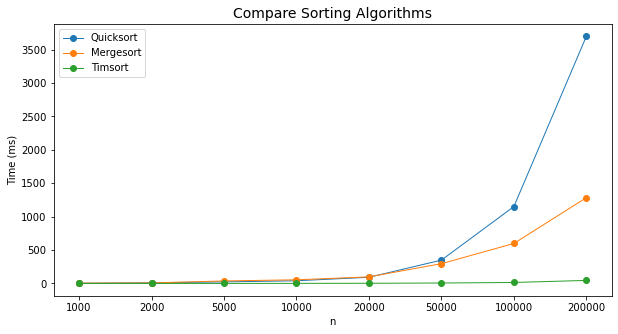

In [17]:
# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(a_time, linewidth = 1, marker="o")
plt.plot(b_time, linewidth = 1, marker="o")
plt.plot(c_time, linewidth = 1, marker="o")
plt.xticks(np.arange(len(n_list)), n_list)
plt.title("Compare Sorting Algorithms", fontsize = 14)
plt.ylabel('Time (ms)')
plt.xlabel('n')
plt.legend(("Quicksort", "Mergesort", "Timsort"), loc = "best")
plt.show()

## 3.4. Convex Hull

In geometry, **the convex hull** or convex envelope or convex closure of a shape is the smallest convex set that contains it. For a bounded subset of the plane, the convex hull may be visualized as the shape enclosed by a rubber band stretched around the subset <a href="#link_five">[5]</a>.

Formally, the convex hull may be defined either as the intersection of all convex sets containing a given subset of a Euclidean space, or equivalently as the set of all convex combinations of points in the subset. Convex hulls of open sets are open, and convex hulls of compact sets are compact. Every convex set is the convex hull of its extreme points.

In [18]:
# Example values
n = 1000
points = []

for i in range(n):
    x = int(random.random() * n)
    y = int(random.random() * n)
    points.append((x, y))

points = np.array(points)

### 3.4.1. Convex Hull from Scratch

In [19]:
# Iterative Convex Hull - Greedy algorithm
def split(u, v, points):
    # return points on left side of UV
    return [p for p in points if np.cross(p - u, v - u) < 0]

def extend(u, v, points):
    if not points:
        return []

    # Find furthest point W, and split search to WV, UW
    w = min(points, key=lambda p: np.cross(p - u, v - u))
    p1, p2 = split(w, v, points), split(u, w, points)
    return extend(w, v, p1) + [w] + extend(u, w, p2)

def convex_hull(points):
    
    # Find two hull points, U, V, and split to left and right search
    u = min(points, key=lambda p: p[0])
    v = max(points, key=lambda p: p[0])
    
    # Find convex hull on each side
    left, right = split(u, v, points), split(v, u, points)
    left_hull, right_hull = extend(u, v, left), extend(v, u, right)
    
    # Merge solution
    return [v] + left_hull + [u] + right_hull + [v]

In [20]:
# Run algorithm
start_time = timeit.default_timer()
hull1 = convex_hull(copy.deepcopy(points))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

>> elapsed time 263.43859999999887 ms


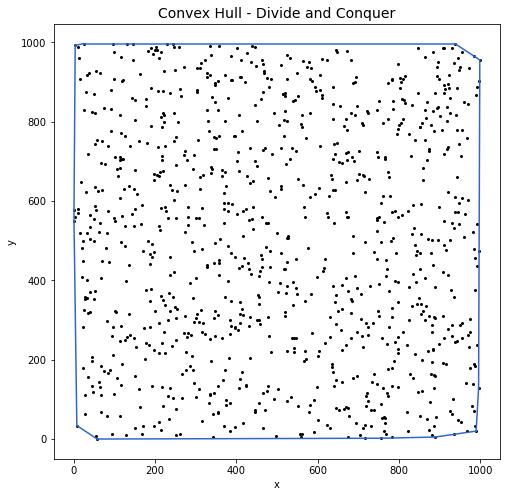

In [21]:
# Plotting convex hull results
plt.figure(figsize = (8, 8))
plt.plot(points[:,0], points[:,1], linewidth=0, marker="o", markersize=2, color="black")
for i in range(1, len(hull1)):
    p1 = hull1[i-1]
    p2 = hull1[i]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color="#3366cc")

plt.title("Convex Hull - Divide and Conquer", fontsize = 14)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

### 3.4.2. Convex Hull with scipy.spatial

In [22]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [23]:
# Run algorithm
start_time = timeit.default_timer()
hull2 = ConvexHull(copy.deepcopy(points))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

>> elapsed time 9.640699999998503 ms


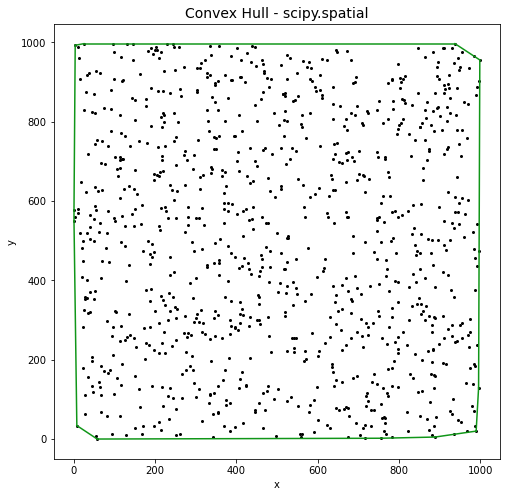

In [24]:
# Plotting convex hull results
plt.figure(figsize = (8, 8))
plt.plot(points[:,0], points[:,1], linewidth=0, marker="o", markersize=2, color="black")
for simplex in hull2.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', color="#109618")

plt.title("Convex Hull - scipy.spatial", fontsize = 14)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## Reference

<a name='link_one' href='https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm' target='_blank' >[1]</a> Wikipedia - Divide-and-Conquer algorithm.  
<a name='link_two' href='https://en.wikipedia.org/wiki/Binary_search_algorithm' target='_blank' >[2]</a> Wikipedia - Binary search.  
<a name='link_three' href='https://en.wikipedia.org/wiki/Quicksort' target='_blank' >[3]</a> Wikipedia - Quicksort.  
<a name='link_four' href='https://en.wikipedia.org/wiki/Merge_sort' target='_blank' >[4]</a> Wikipedia - Merge sort.  
<a name='link_five' href='https://en.wikipedia.org/wiki/Convex_hull' target='_blank' >[5]</a> Wikipedia - Convex hull.  

---
<a href="https://ansegura7.github.io/Algorithms/">« Home</a>